### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example]("https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg")

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('non_linear.csv')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [5]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def generate_degree(X, degree):
    return np.array([X**n for n in range(1,degree+1)]).T

In [6]:
degree = 8
X = generate_degree(data.x_train,degree)
y = data.y_train.values

In [7]:
model_lasso = Lasso(alpha=0.8).fit(X,y)

C:\Users\sean2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.335308493501576, tolerance: 0.0031912256832197063
  model = cd_fast.enet_coordinate_descent(


In [9]:
midel_ridge = Ridge(alpha=0.8).fit(X,y)
np.linspace(1,degree,degree)

array([1., 2., 3., 4., 5., 6., 7., 8.])

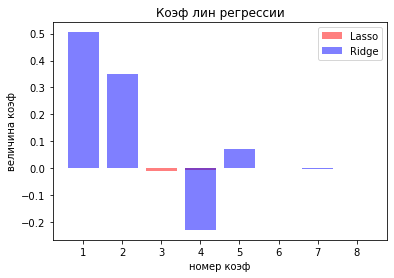

In [11]:
fig, sub = plt.subplots()

sub.bar(np.linspace(1,degree,degree), model_lasso.coef_,color='r',alpha=0.5)
sub.bar(np.linspace(1,degree,degree), midel_ridge.coef_,color='b',alpha=0.5)

sub.set_title("Коэф лин регрессии")

sub.set_xlabel("номер коэф")
sub.set_ylabel('величина коэф')
sub.legend(['Lasso','Ridge'])


plt.show()

Модель лассо похоже что не сошлась

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!